In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

#Set number of Cl atoms, timesteps and extract lines with Cl

step_count = []
cl = []

with open('long.lammpstrj') as file:
    content = file.readlines()
for line in content:
    if 'TIMESTEP' in line:
        step_count.append(line)

with open('long.lammpstrj') as file:
    content = file.readlines()
for line in content:
    if 'O ' in line: #Mixed up O and Cl labels
        cl.append(line)

steps = len(step_count)
cl_atoms = int(len(cl) / len(step_count))

#Sort out coordinates by dimension         
        
cl_coords = [[] for x in range(0, cl_atoms)]
cl_coords_split = [[] for x in range(0, cl_atoms)]
cl_coords_x = [[] for x in range(0, cl_atoms)]
cl_coords_y = [[] for x in range(0, cl_atoms)]
cl_coords_z = [[] for x in range(0, cl_atoms)]
    
for n in range(0, cl_atoms):
    for i in range (n, steps * cl_atoms, cl_atoms):
        cl_coords[n].append(cl[i])
    for i in cl_coords[n]:
        cl_coords_split[n].append(i.split())
    for i in range(0, steps):
        cl_coords_x[n].append(float(cl_coords_split[n][i][1]))
    for i in range(0, steps):
        cl_coords_y[n].append(float(cl_coords_split[n][i][2]))
    for i in range(0, steps):
        cl_coords_z[n].append(float(cl_coords_split[n][i][3]))

#Minimum image convention implementation

cl_msd = [[] for x in range(0, cl_atoms)]

for n in range(0, cl_atoms):
    box = 13.504
    box_r = 1/(0.5*13.504)
    initial = 0
    for t in range(0, (steps-1)):
        dx = cl_coords_x[n][t+1] - cl_coords_x[n][t]
        x = int(dx * box_r)
        dx -= x * box
        dy = cl_coords_y[n][t+1] - cl_coords_y[n][t]
        y = int(dy * box_r)
        dy -= y * box
        dz = cl_coords_z[n][t+1] - cl_coords_z[n][t]
        z = int(dz * box_r)
        dz -= z * box       
        step = (dx)**2 + (dy)**2 + (dz)**2
        total = initial + step
        cl_msd[n].append(total)
        initial = total

#Create list with cumulative msd for all Cl atoms         
        
cl_total_msd = []

for t in range(0, (steps-1)):
    initial = 0
    for n in range (0, cl_atoms):
        msdt = cl_msd[n][t] + initial
        initial = msdt
    cl_total_msd.append(msdt)

#Create list with cumulative msd for a single Cl atom on average      
    
cl_mean_msd = []

for i in cl_total_msd:
    cl_mean_msd.append(i/cl_atoms)

In [37]:
#Set number of Na atoms, timesteps and extract lines with Na

step_count = []
na = []

with open('long.lammpstrj') as file:
    content = file.readlines()
for line in content:
    if 'TIMESTEP' in line:
        step_count.append(line)

with open('long.lammpstrj') as file:
    content = file.readlines()
for line in content:
    if 'Na ' in line:
        na.append(line)

steps = len(step_count)
na_atoms = int(len(na) / len(step_count))

#Sort out coordinates by dimension        
        
na_coords = [[] for x in range(0, na_atoms)]
na_coords_split = [[] for x in range(0, na_atoms)]
na_coords_x = [[] for x in range(0, na_atoms)]
na_coords_y = [[] for x in range(0, na_atoms)]
na_coords_z = [[] for x in range(0, na_atoms)]
    
for n in range(0, na_atoms):
    for i in range (n, steps * na_atoms, na_atoms):
        na_coords[n].append(na[i])
    for i in na_coords[n]:
        na_coords_split[n].append(i.split())
    for i in range(0, steps):
        na_coords_x[n].append(float(na_coords_split[n][i][1]))
    for i in range(0, steps):
        na_coords_y[n].append(float(na_coords_split[n][i][2]))
    for i in range(0, steps):
        na_coords_z[n].append(float(na_coords_split[n][i][3]))

#Minimum image convention implementation       
        
na_msd = [[] for x in range(0, na_atoms)]

for n in range(0, na_atoms):
    box = 13.504
    box_r = 1/(0.5*13.504)
    initial = 0
    for t in range(0, (steps-1)):
        dx = na_coords_x[n][t+1] - na_coords_x[n][t]
        x = int(dx * box_r)
        dx -= x * box
        dy = na_coords_y[n][t+1] - na_coords_y[n][t]
        y = int(dy * box_r)
        dy -= y * box
        dz = na_coords_z[n][t+1] - na_coords_z[n][t]
        z = int(dz * box_r)
        dz -= z * box       
        step = (dx)**2 + (dy)**2 + (dz)**2
        total = initial + step
        na_msd[n].append(total)
        initial = total

#Create list with cumulative msd for all Na atoms         
        
na_total_msd = []

for t in range(0, (steps-1)):
    initial = 0
    for n in range (0, na_atoms):
        msdt = na_msd[n][t] + initial
        initial = msdt
    na_total_msd.append(msdt)

#Create list with cumulative msd for a single Na atom on average    
    
na_mean_msd = []

for i in na_total_msd:
    na_mean_msd.append(i/na_atoms)

Text(0.5, 1.0, 'MSD in 3x3x3 Na3OCl supercell \n with 3 vacant sites at 800 K over 2000 ps')

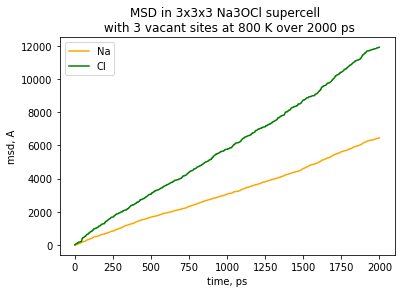

In [38]:
import matplotlib.pyplot as plt

plt.plot(range(0, 2000), na_mean_msd, color='orange')
plt.plot(range(0, 2000), cl_mean_msd, color='green')
plt.xlabel('time, ps')
plt.ylabel('msd, A')
plt.legend(labels=['Na', 'Cl'], loc='upper left')
plt.title('MSD in 3x3x3 Na3OCl supercell \n with 3 vacant sites at 800 K over 2000 ps')